In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the CSV file


In [2]:
df = pd.read_csv("train.csv")
df.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

Delete the null values in the csv


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df = df.dropna()

In [8]:
df = df.drop(['Name','Cabin','Embarked','PassengerId','Ticket'], axis = 'columns')


Fill the empty cells with mean and frequently occured 

In [9]:
mean = df['Age'].mean()
df['Age'].fillna(mean,inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Sex       183 non-null    object 
 3   Age       183 non-null    float64
 4   SibSp     183 non-null    int64  
 5   Parch     183 non-null    int64  
 6   Fare      183 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 11.4+ KB


Convert float into int

In [13]:
df['Age'] = np.round(df['Age'])
df['Age'] = df['Age'].astype(int)


In [14]:
df['Fare'] = np.round(df['Fare'])
df['Fare'] = df['Fare'].astype(int)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  183 non-null    int64 
 1   Pclass    183 non-null    int64 
 2   Sex       183 non-null    object
 3   Age       183 non-null    int64 
 4   SibSp     183 non-null    int64 
 5   Parch     183 non-null    int64 
 6   Fare      183 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 11.4+ KB


Do Label encoder for the Sex

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex']
)

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,1,1,0,29,1,0,71
3,1,1,0,26,1,0,53
6,0,1,1,45,0,0,52
10,1,3,0,3,1,1,17
11,1,1,0,49,0,0,27


In [20]:
df1 = pd.read_csv("test.csv")
df.shape

(183, 7)

In [22]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
df1 = df1.dropna()

In [25]:
df1 = df1.drop(['Name','Cabin','Embarked','PassengerId','Ticket'], axis = 'columns')
mean = df1['Age'].mean()
df1['Age'].fillna(mean,inplace = True)

In [28]:
df1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
12,1,female,23,1,0,82
14,1,female,47,1,0,61
24,1,female,48,1,3,262
26,1,female,22,0,1,61
28,1,male,41,0,0,30


In [27]:
df1['Age'] = np.round(df1['Age'])
df1['Age'] = df1['Age'].astype(int)
df1['Fare'] = df1['Fare'].astype(int)


In [46]:

df["Survived"] = df["Survived"].replace([0,1],["Not Survived","Survived"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,Survived,1,0,29,1,0,71
3,Survived,1,0,26,1,0,53
6,Not Survived,1,1,45,0,0,52
10,Survived,3,0,3,1,1,17
11,Survived,1,0,49,0,0,27


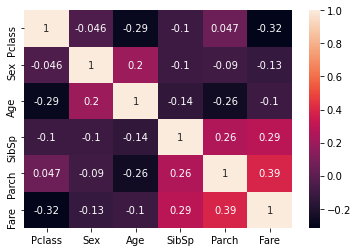

In [33]:
sns.heatmap(df.corr(),annot=True)
plt.show()

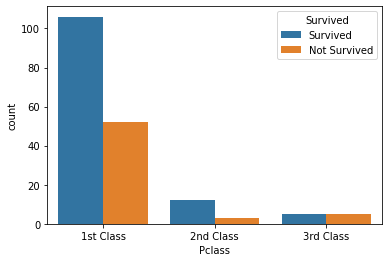

In [36]:
#Number of people survivor and dead in class

x = [0,1,2]
sns.countplot ("Pclass", data = df , hue="Survived")
labels = ["1st Class", "2nd Class", "3rd Class"]
plt.xticks(x,labels)
plt.show()


/Users/mahilans/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


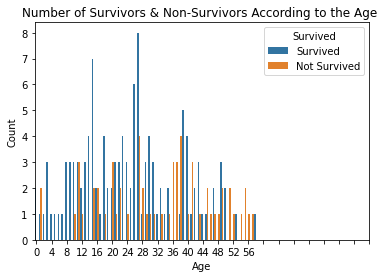

In [45]:
sns.countplot("Age",data = df, hue = "Survived")
plt.title("Number of Survivors & Non-Survivors According to the Age ")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(range(0,90,4))
plt.show()

/Users/mahilans/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


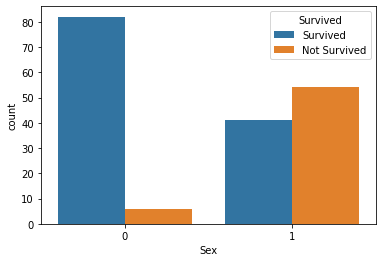

In [44]:
sns.countplot("Sex", data = df, hue ="Survived")
plt.show()

In [37]:
X = df.drop(columns = "Survived",axis =1)
Y = df["Survived"]

In [39]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [40]:
logis = LogisticRegression(solver='liblinear')

In [43]:
from sklearn.metrics import accuracy_score
xtrain_predict = logis.fit(xtrain,ytrain)
xtrain_predict = logis.predict(xtrain)
lo_train_predict = pd.DataFrame({"Predicted Value" : xtrain_predict,
                              "Actual Value" : ytrain
})
train_lo_as = accuracy_score(xtrain_predict,ytrain)
print("LogisticRegression Train Data Accuracy Score: ",train_lo_as)


lo_train_predict.head()

LogisticRegression Train Data Accuracy Score:  0.726027397260274


,Predicted Value,Actual Value
257,Survived,Survived
486,Survived,Survived
630,Not Survived,Survived
430,Not Survived,Survived
299,Survived,Survived
